In [ ]:
import numpy as np

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as colors
import matplotlib.style as mplstyle

import seaborn as sns

import glob


In [ ]:
plt.style.use('default')
sns.set_theme(context='paper', style='white', palette='viridis', font='serif',
            font_scale=2, color_codes=True, rc={'text.usetex' : True})
mplstyle.use('fast')

In [ ]:
DATA_PATH = "../../output/"

# DATA_DIR = "Homo_sine_no_strat__no_bias_5_5_1000_200_0.0001_runs_50"
# DATA_DIR = "Hetero_sine_no_strat__no_bias_5_5_1000_200_0.0001_runs_50"
# DATA_DIR = "Homo_sine_loss_strat__no_bias_5_5_1000_200_0.0001_runs_50"
# DATA_DIR = "Hetero_sine_loss_strat__no_bias_5_5_1000_200_0.0001_runs_50"
# DATA_DIR = "Homo_sine_weight_strat__no_bias_5_5_1000_200_0.0001_runs_50"
# DATA_DIR = "Hetero_sine_weight_strat__no_bias_5_5_1000_200_0.0001_runs_50"


In [ ]:
DATA_DIR = "Homo_sine_no_strat__no_bias_5_5_1000_50_0.0001_runs_50"
# DATA_DIR = "Hetero_sine_no_strat__no_bias_5_5_1000_50_0.0001_runs_50"
# DATA_DIR = "Homo_sine_loss_strat__no_bias_5_5_1000_50_0.0001_runs_50"
# DATA_DIR = "Hetero_sine_loss_strat__no_bias_5_5_1000_50_0.0001_runs_50"
# DATA_DIR = "Homo_sine_weight_strat__no_bias_5_5_1000_50_0.0001_runs_50"
# DATA_DIR = "Hetero_sine_weight_strat__no_bias_5_5_1000_50_0.0001_runs_50"

In [ ]:
run_dirs = glob.glob(DATA_PATH+ DATA_DIR + "/run_*")

In [ ]:
run_dirs

['../../output/Homo_sine_no_strat__no_bias_5_5_1000_50_0.0001_runs_50/run_39',
 '../../output/Homo_sine_no_strat__no_bias_5_5_1000_50_0.0001_runs_50/run_12',
 '../../output/Homo_sine_no_strat__no_bias_5_5_1000_50_0.0001_runs_50/run_19',
 '../../output/Homo_sine_no_strat__no_bias_5_5_1000_50_0.0001_runs_50/run_24',
 '../../output/Homo_sine_no_strat__no_bias_5_5_1000_50_0.0001_runs_50/run_29',
 '../../output/Homo_sine_no_strat__no_bias_5_5_1000_50_0.0001_runs_50/run_38',
 '../../output/Homo_sine_no_strat__no_bias_5_5_1000_50_0.0001_runs_50/run_23',
 '../../output/Homo_sine_no_strat__no_bias_5_5_1000_50_0.0001_runs_50/run_28',
 '../../output/Homo_sine_no_strat__no_bias_5_5_1000_50_0.0001_runs_50/run_42',
 '../../output/Homo_sine_no_strat__no_bias_5_5_1000_50_0.0001_runs_50/run_6',
 '../../output/Homo_sine_no_strat__no_bias_5_5_1000_50_0.0001_runs_50/run_48',
 '../../output/Homo_sine_no_strat__no_bias_5_5_1000_50_0.0001_runs_50/run_45',
 '../../output/Homo_sine_no_strat__no_bias_5_5_1000_5

In [ ]:
neuron_history = [np.loadtxt(run_dir + "/neurons.txt") for run_dir in run_dirs]

In [ ]:
neuron_history[0]

array([11., 11., 11., 11., 11., 11., 11., 11., 11., 11., 11., 11., 11.,
       11., 11., 11., 11., 11., 11., 11., 11., 11., 11., 11., 11., 11.,
       11., 11., 11., 11., 11., 11., 11., 11., 11., 11., 11., 11., 11.,
       11., 11., 11., 11., 11., 11., 11., 11., 11., 11., 11., 11., 11.,
       11., 11., 11., 11., 11., 11., 11., 11., 11., 11., 11., 11., 11.,
       11., 11., 11., 11., 11., 11., 11., 11., 11., 11., 11., 11., 11.,
       11., 11., 11., 11., 11., 11., 11., 11., 11., 11., 11., 11., 11.,
       11., 11., 11., 11., 11., 11., 11., 11., 11., 11., 11., 11., 11.,
       11., 11., 11., 11., 11., 11., 11., 11., 11., 11., 11., 11., 11.,
       11., 11., 11., 11., 11., 11., 11., 11., 11., 11., 11., 11., 11.,
       11., 11., 11., 11., 11., 11., 11., 11., 11., 11., 11., 11., 11.,
       11., 11., 11., 11., 11., 11., 11., 11., 11., 11., 11., 11., 11.,
       11., 11., 11., 11., 11., 11., 11., 11., 11., 11., 11., 11., 11.,
       11., 11., 11., 11., 11., 11., 11., 11., 11., 11., 11., 11

In [ ]:
first_removal_history = []
for neurons in neuron_history:
    diff = np.diff(neurons)
    try:
        index = np.where(diff < 0)[0][0] + 1
    except IndexError:
        index = np.nan
    first_removal_history.append(index)


In [ ]:
non_removal_density = np.isnan(first_removal_history).sum()/len(first_removal_history)

In [ ]:
non_removal_density

1.0

Text(0.5, 1.0, 'first neuron removal epoch')

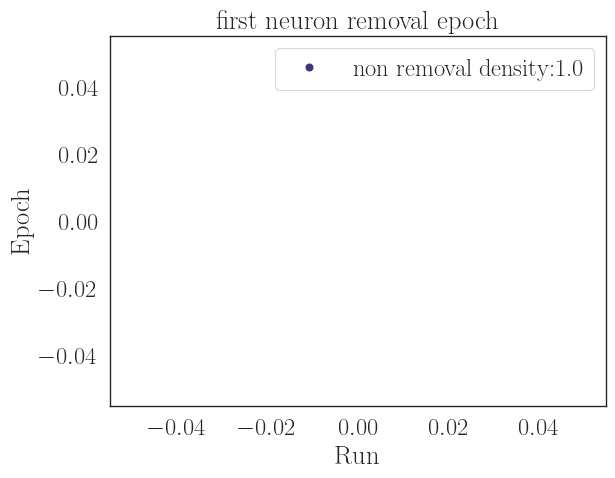

In [ ]:
plt.plot(first_removal_history, "o", label=f"non removal density:{non_removal_density}")
plt.ylabel("Epoch")
plt.xlabel("Run")
plt.legend()
plt.title("first neuron removal epoch")


In [ ]:
from scipy import stats 

first_removal_mode = stats.mode(first_removal_history, nan_policy= "omit")

In [ ]:
first_removal_mode

ModeResult(mode=nan, count=0.0)

In [ ]:
loss_history = [np.loadtxt(run_dir + "/loss.txt") for run_dir in run_dirs]

In [ ]:
y_pred_history = [np.loadtxt(run_dir + "/y_pred.txt") for run_dir in run_dirs]
y_pred_mean = np.mean(y_pred_history, axis = 0)
y_pred_std = np.std(y_pred_history, axis = 0)

In [ ]:
x = np.linspace(0, 2*np.pi, 100)
y = np.sin(x)

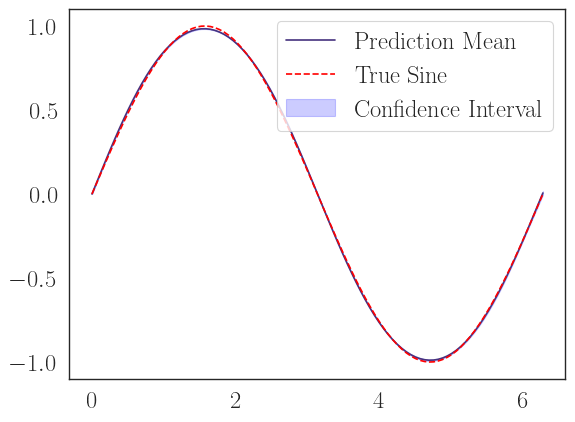

In [ ]:
plt.plot(x, y_pred_mean, label='Prediction Mean')
plt.plot(x, y, 'r--' ,label='True Sine')
plt.fill_between(x, y_pred_mean - y_pred_std, y_pred_mean + y_pred_std, color='blue', alpha=0.2, label='Confidence Interval')
plt.legend()
plt.show()

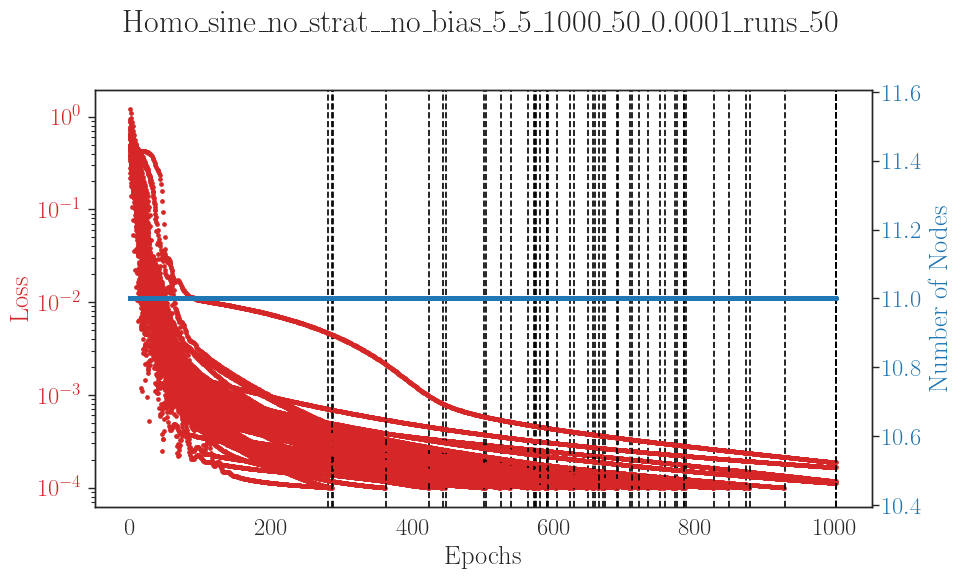

In [ ]:
fig, ax1 = plt.subplots(figsize=(10, 6))

loss_color = 'tab:red'
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss', color=loss_color)
ax1.tick_params(axis='y', labelcolor=loss_color)
ax1.set_yscale("log")

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

neuron_color = 'tab:blue'
ax2.set_ylabel('Number of Nodes', color=neuron_color)  # we already handled the x-label with ax1
ax2.tick_params(axis='y', labelcolor=neuron_color)

for losses, neurons in zip(loss_history, neuron_history):
    num_epochs = len(losses)
    ax1.plot(np.arange(0,num_epochs), losses, ".", color=loss_color)
    ax2.plot(np.arange(0,num_epochs), neurons, ".", color=neuron_color)
    ax1.axvline(num_epochs, 0, 1, color="black", linestyle="--")


plt.suptitle(DATA_DIR)
fig.tight_layout()